<a href="https://colab.research.google.com/github/Kinnaruo/MachineLearning/blob/main/Week%204/Feature_Engineering_Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [21]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv"

df= pd.read_csv(url)
df.head()

# Cek info awal
print(df.info())
print(df.describe())

# Cek missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

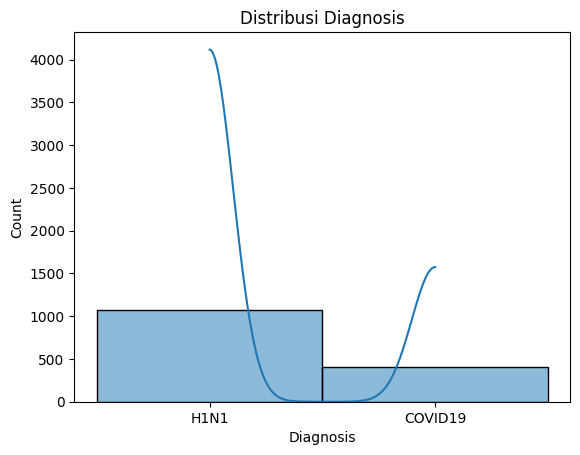

In [22]:
target = 'Diagnosis'  # Ganti kalau target lain
y = df[target]

# Cek distribusi target
sns.histplot(df[target], kde=True)
plt.title(f'Distribusi {target}')
plt.show()

df = df.drop(target, axis=1)

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputasi sederhana
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df = pd.get_dummies(df)

In [33]:
# Split train/test
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Pakai Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8619528619528619
              precision    recall  f1-score   support

     COVID19       0.85      0.67      0.75        90
        H1N1       0.87      0.95      0.91       207

    accuracy                           0.86       297
   macro avg       0.86      0.81      0.83       297
weighted avg       0.86      0.86      0.86       297



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


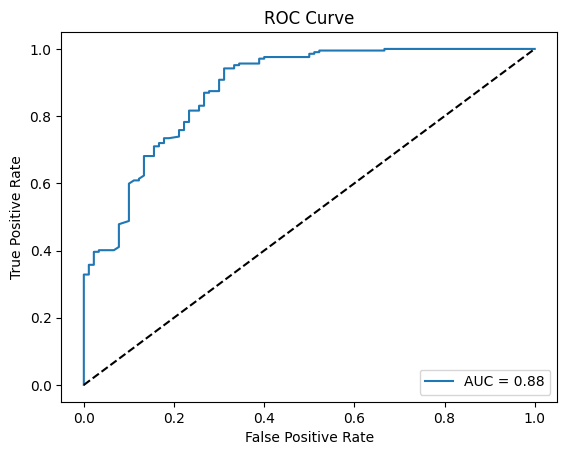

AUC Score: 0.8816425120772947


In [36]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # ambil probabilitas kelas positif

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
# AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {auc}")

# Matriks Evaluasi
## **Accuracy**
Accuracy mengukur seberapa sering model membuat prediksi yang benar dibandingkan dengan total data.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Di mana:  
- $TP$ = True Positive  
- $TN$ = True Negative  
- $FP$ = False Positive  
- $FN$ = False Negative  

Semakin tinggi **accuracy**, semakin baik performa model secara keseluruhan.

## **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif.

$$
Precision = \frac{TP}{TP + FP}
$$

Precision tinggi berarti model jarang salah dalam memprediksi kelas positif. Berguna ketika **false positive** harus diminimalkan, misalnya dalam **deteksi kanker**.

## **Recall**
Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

$$
Recall = \frac{TP}{TP + FN}
$$

Recall tinggi berarti model tidak melewatkan banyak sampel positif. Sangat penting dalam **deteksi penyakit atau penipuan**, di mana **false negative** harus diminimalkan.

##**F1 Score**
F1 Score adalah rata-rata harmonik antara Precision dan Recall. Berguna saat dataset tidak seimbang.

$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

F1 Score tinggi berarti keseimbangan yang baik antara Precision dan Recall.

## **ROC dan AUC**
ROC (**Receiver Operating Characteristic**) adalah kurva yang menunjukkan trade-off antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)**.

$$
TPR = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$

Jika nilai semakin mendekati 1, semakin bagus modelnya. Sedangkan jika nilai di bawah 0.5, model tersebut lebih buruk dari tebakan acak.